In [ ]:
!wget http://vectors.nlpl.eu/repository/20/8.zip



--2022-11-17 05:57:51--  http://vectors.nlpl.eu/repository/20/8.zip
Resolving vectors.nlpl.eu (vectors.nlpl.eu)... 129.240.189.181
Connecting to vectors.nlpl.eu (vectors.nlpl.eu)|129.240.189.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 672739461 (642M) [application/zip]
Saving to: ‘8.zip’

8.zip               100%[===================>] 641.57M  10.4MB/s    in 64s     

2022-11-17 05:58:57 (9.97 MB/s) - ‘8.zip’ saved [672739461/672739461]



In [ ]:
!unzip 8.zip


Archive:  8.zip
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [ ]:
#make an embedding

import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

embeddings_dict = {}
with open("./model.txt", 'r',encoding="utf8") as f:
    for line in f:
        try:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], "float32")
            embeddings_dict[word] = vector
        except:
           #there is some weird encoding in a few lines:
            values = line.split()
            word = values[0]
            print(word)



def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))



2
1
3
<dfn
<wbr
4
<rt
<ruby
5
1
6
33
7
8
1
<ref
<ref
<rt
<ruby
<rt
<ruby
<score


In [ ]:


def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))


In [ ]:
#test all the above:

print(find_closest_embeddings(embeddings_dict["king"])[:5])

#(should give something like king, kings etc.)

['king', 'kings', 'King', 'kingdom', 'prince']


New tasks:

A:
Play around with the embedding vectors. In particular, try comparing relationships between word vectors. For instance, is it true that 'man' relates to 'woman' as 'king' relates to 'queen'?

B:
Create a t-SNE plot like the one shown during the lecture.



In [ ]:
#A:

print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])


print(find_closest_embeddings(
    embeddings_dict["man"]- embeddings_dict["king"] + embeddings_dict["queen"]
)[:5])

print(find_closest_embeddings(
    embeddings_dict["man"]- embeddings_dict["boy"] + embeddings_dict["girl"]
)[:5])


['hand', 'stick', 'gloved', 'sanitizers', 'overplayed']
['woman', 'man', 'lady', 'girl', 'worker']
['man', 'woman', 'girl', 'person', 'lady']


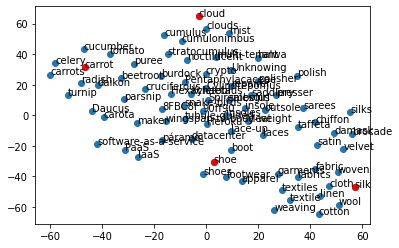

In [ ]:

words =find_closest_embeddings(
    embeddings_dict["silk"]
)[0:20]+find_closest_embeddings(
    embeddings_dict["shoe"]
)[0:20]+find_closest_embeddings(
    embeddings_dict["cloud"]
)[0:20]+find_closest_embeddings(
    embeddings_dict["carrot"]
)[0:20]


vectors = [embeddings_dict[word] for word in words]

Y = tsne.fit_transform(vectors)

plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

for w in ('silk','shoe','cloud','carrot'):
    idx=words.index(w)
    plt.plot(Y[idx, 0], Y[idx, 1],'or')

plt.show()